In [29]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

In [229]:
def tsmom(data,months):
    vol=pd.rolling_std(data.pct_change(),36)*math.sqrt(12)
    signal=data/data.shift(months)-1
    signal = signal /abs(signal)
    position=signal / vol 
    return position

def calc_pnl(position,data):
    return position*data.pct_change().shift(1)

def calc_Sharpe(pnl,N=12):
    return np.sqrt(N) * pnl.mean() / pnl.std()

def ew_portfolio_pnl(pnl):
    return pnl.divide(pnl.count(axis=1),axis=0).sum(axis=1)

In [265]:
data=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')
markets=pd.read_csv('contracts.csv',index_col=0)
volume=pd.read_csv('volume_data.csv',index_col=0)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [179]:
data=data[markets.loc[markets.Sector=='Commodities'].T.columns]

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=36,center=False).std()
  from IPython.kernel.zmq import kernelapp as app


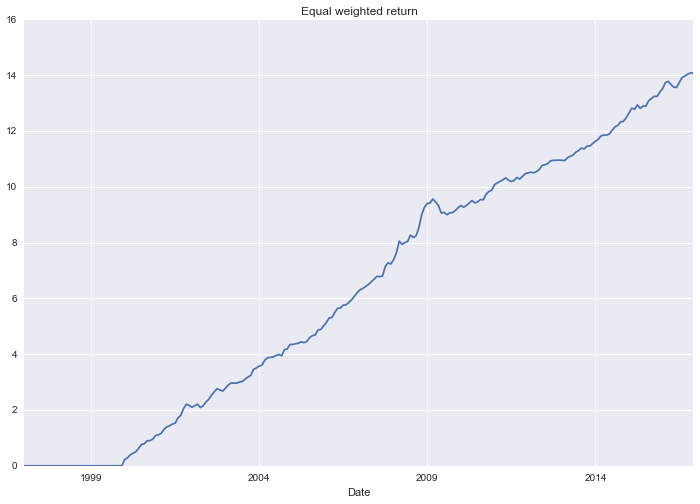

In [266]:
pos=tsmom(data,12)
pnl=calc_pnl(pos,data)
sr=calc_Sharpe(pnl)
ew_portfolio_pnl(pnl).cumsum().plot(title='Equal weighted return')

In [267]:
sr.loc[sr<0]

TecDAX            -0.315926
Singapore 180     -0.140680
Singapore 380     -0.140303
Shanghai  Rebar   -0.079158
Cheese            -0.072720
dtype: float64

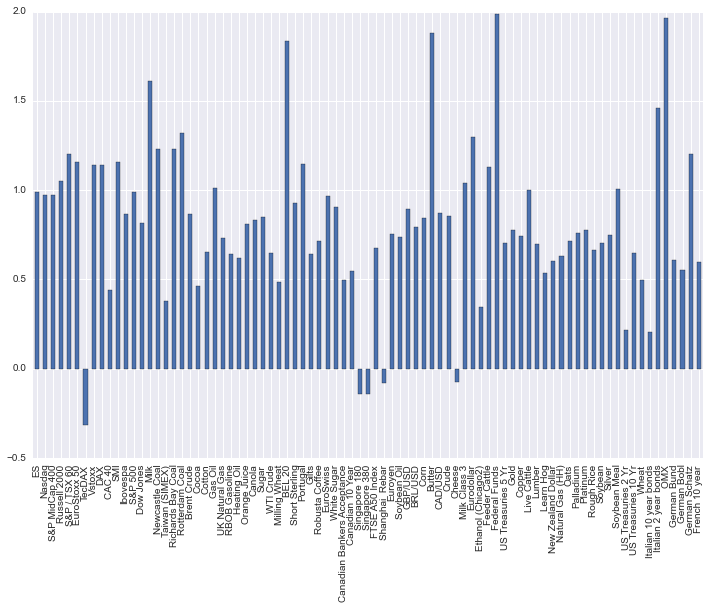

In [268]:
sr.dropna().plot(kind='bar')

In [269]:
df=pd.DataFrame()
df['SR']=sr
df['Volume']=volume.mean()

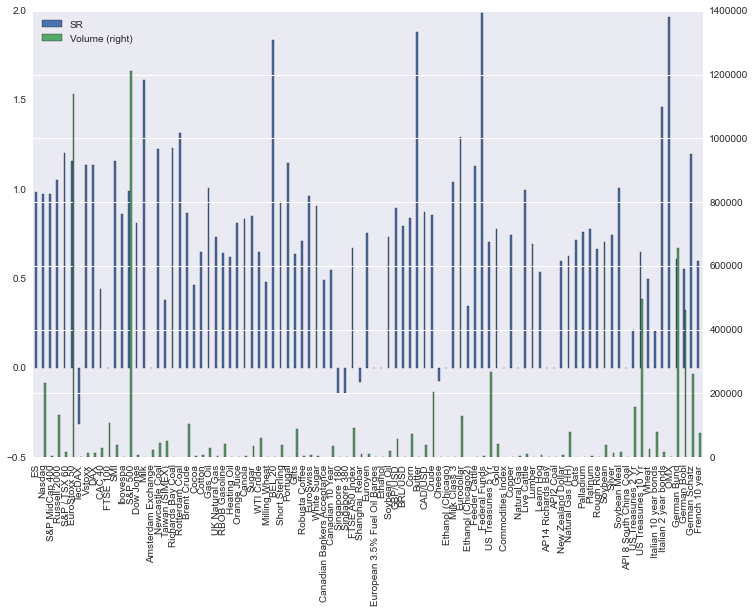

In [270]:
df.plot(kind='bar',secondary_y='Volume')

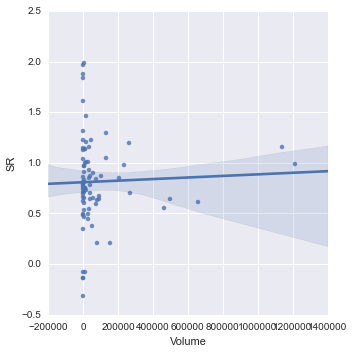

In [271]:
sns.lmplot('Volume','SR',df.loc[df.SR<17])